In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Handle missing values
1. Handle Missing values
2. Handling Duplicate
3. Check data type
4. Understand the dataset

In [106]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [108]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [109]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [110]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [111]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [112]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [113]:
#Check missing values 
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() != 0]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), 'missing values')

Age 4.62357 missing values
TypeofContact 0.51146 missing values
DurationOfPitch 5.13502 missing values
NumberOfFollowups 0.92062 missing values
PreferredPropertyStar 0.53191 missing values
NumberOfTrips 2.86416 missing values
NumberOfChildrenVisiting 1.35025 missing values
MonthlyIncome 4.76678 missing values


In [114]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [115]:
df['PreferredPropertyStar'].value_counts()


PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
Name: count, dtype: int64

In [116]:
#Replace null values with mode for categorical feature and ordinal feature 
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#Replace null values with median for continuous feature
df.Age.fillna(df.Age.median(), inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)


In [117]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [118]:
df.drop('CustomerID', inplace=True, axis=1)

#### Feature Engineering

Feature Extraction

In [119]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)

In [120]:
#numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

#categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features, cat_features

(['ProdTaken',
  'Age',
  'CityTier',
  'DurationOfPitch',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'MonthlyIncome',
  'TotalVisiting'],
 ['TypeofContact',
  'Occupation',
  'Gender',
  'ProductPitched',
  'MaritalStatus',
  'Designation'])

In [121]:
#discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]

#continuous features
continuous_features = [feature for feature in num_features if feature not in discrete_features]

discrete_features

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'TotalVisiting']

#### Train test split and model training

In [122]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [123]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
Xtrain.shape, Xtest.shape

((3666, 17), (1222, 17))

In [124]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

#Fit and transform the train data
Xtrain = ct.fit_transform(Xtrain)

#Transform the train data
Xtest = ct.transform(Xtest)

In [126]:
Xtrain.shape

(3666, 26)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(Xtrain, ytrain)

    #Make predictions
    ytrain_pred = model.predict(Xtrain)
    ytest_pred = model.predict(Xtest)

    #Training set performance
    train_accuracy = accuracy_score(ytrain, ytrain_pred)
    train_precision = precision_score(ytrain, ytrain_pred)
    train_recall = recall_score(ytrain, ytrain_pred)
    train_f1 = f1_score(ytrain, ytrain_pred, average='weighted')
    train_roc_auc_score = roc_auc_score(ytrain, ytrain_pred)

    #Test set performance
    test_accuracy = accuracy_score(ytest, ytest_pred)
    test_precision = precision_score(ytest, ytest_pred)
    test_recall = recall_score(ytest, ytest_pred)
    test_f1 = f1_score(ytest, ytest_pred, average='weighted')
    test_roc_auc_score = roc_auc_score(ytest, ytest_pred)

    print(list(models.keys())[i])
    # Training set performance
    print("Training Set Performance:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC Score: {train_roc_auc_score:.4f}")
    print("\n")  
    # Test set performance
    print("Test Set Performance:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"ROC AUC Score: {test_roc_auc_score:.4f}")

    print('='*35)



LogisticRegression
Training Set Performance:
Accuracy: 0.8432
Precision: 0.7061
Recall: 0.2999
F1 Score: 0.8164
ROC AUC Score: 0.6353


Test Set Performance:
Accuracy: 0.8445
Precision: 0.6571
Recall: 0.3094
F1 Score: 0.8209
ROC AUC Score: 0.6367
Decision Tree
Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


Test Set Performance:
Accuracy: 0.9043
Precision: 0.7265
Recall: 0.7623
F1 Score: 0.9051
ROC AUC Score: 0.8491
Random Forest
Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


Test Set Performance:
Accuracy: 0.9272
Precision: 0.9527
Recall: 0.6323
F1 Score: 0.9211
ROC AUC Score: 0.8126


In [130]:
#Hyperparameter tuning
rf_params = {'max_depth': [5,8,15,None, 10],
             'max_features': [5,7,'auto', 8],
             'min_samples_split': [2,8,15,20],
             'n_estimators': [100,200,500,1000]}

In [132]:
#Models list for hyperparameter tuning
randomcv_models = [('RF', RandomForestClassifier(), rf_params)]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [135]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model , param in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=param,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(Xtrain, ytrain)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'--------Best params for {model_name}')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] E

In [136]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, max_features=7)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(Xtrain, ytrain)

    #make predictions
    ytrain_pred = model.predict(Xtrain)
    ytest_pred = model.predict(Xtest)

    #Training set performance
    train_accuracy = accuracy_score(ytrain, ytrain_pred)
    train_precision = precision_score(ytrain, ytrain_pred)
    train_recall = recall_score(ytrain, ytrain_pred)
    train_f1 = f1_score(ytrain, ytrain_pred, average='weighted')
    train_roc_auc_score = roc_auc_score(ytrain, ytrain_pred)

    #Test set performance
    test_accuracy = accuracy_score(ytest, ytest_pred)
    test_precision = precision_score(ytest, ytest_pred)
    test_recall = recall_score(ytest, ytest_pred)
    test_f1 = f1_score(ytest, ytest_pred, average='weighted')
    test_roc_auc_score = roc_auc_score(ytest, ytest_pred)

    print(list(models.keys())[i])
    # Training set performance
    print("Training Set Performance:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC Score: {train_roc_auc_score:.4f}")
    print("\n")  
    # Test set performance
    print("Test Set Performance:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"ROC AUC Score: {test_roc_auc_score:.4f}")

    print('='*35)


    

Random Forest
Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


Test Set Performance:
Accuracy: 0.9362
Precision: 0.9503
Recall: 0.6861
F1 Score: 0.9320
ROC AUC Score: 0.8390


<Figure size 640x480 with 0 Axes>

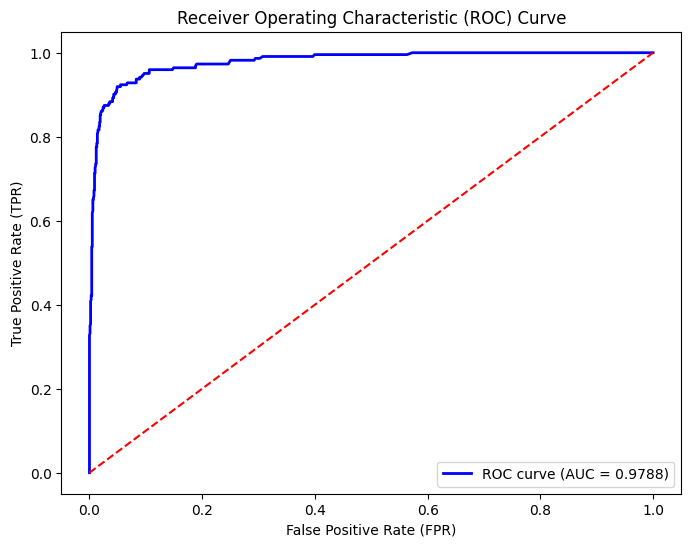

In [143]:
#pot ROC UC Curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.figure()

auc_models = [
    {
        'label': 'Random Forest Classifier',
        "model": RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, max_features=7),
        'auc': 0.8390
    }
]

for alg in auc_models:
    model = alg['model']
    model.fit(Xtrain, ytrain)
    ypred = model.predict_proba(Xtest)[:,1]

    #Compute fpr ,tpr
    fpr, tpr, thresholds = roc_curve(ytest, ypred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()